In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import zipfile
import requests
import io


In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall("bank_data")


In [9]:
bank_data = pd.read_csv("bank_data/bank-full.csv", sep=';')
print("Sample Data:\n", bank_data.head())

Sample Data:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [10]:
label_encoder = LabelEncoder()
for col in bank_data.select_dtypes(include=['object']).columns:
    bank_data[col] = label_encoder.fit_transform(bank_data[col])

In [11]:
print("\nMissing values:\n", bank_data.isnull().sum())


Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain shape:", X_train.shape, "\nTest shape:", X_test.shape)



Train shape: (36168, 16) 
Test shape: (9043, 16)


In [13]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = clf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8740462235983634

Confusion Matrix:
 [[7378  574]
 [ 565  526]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



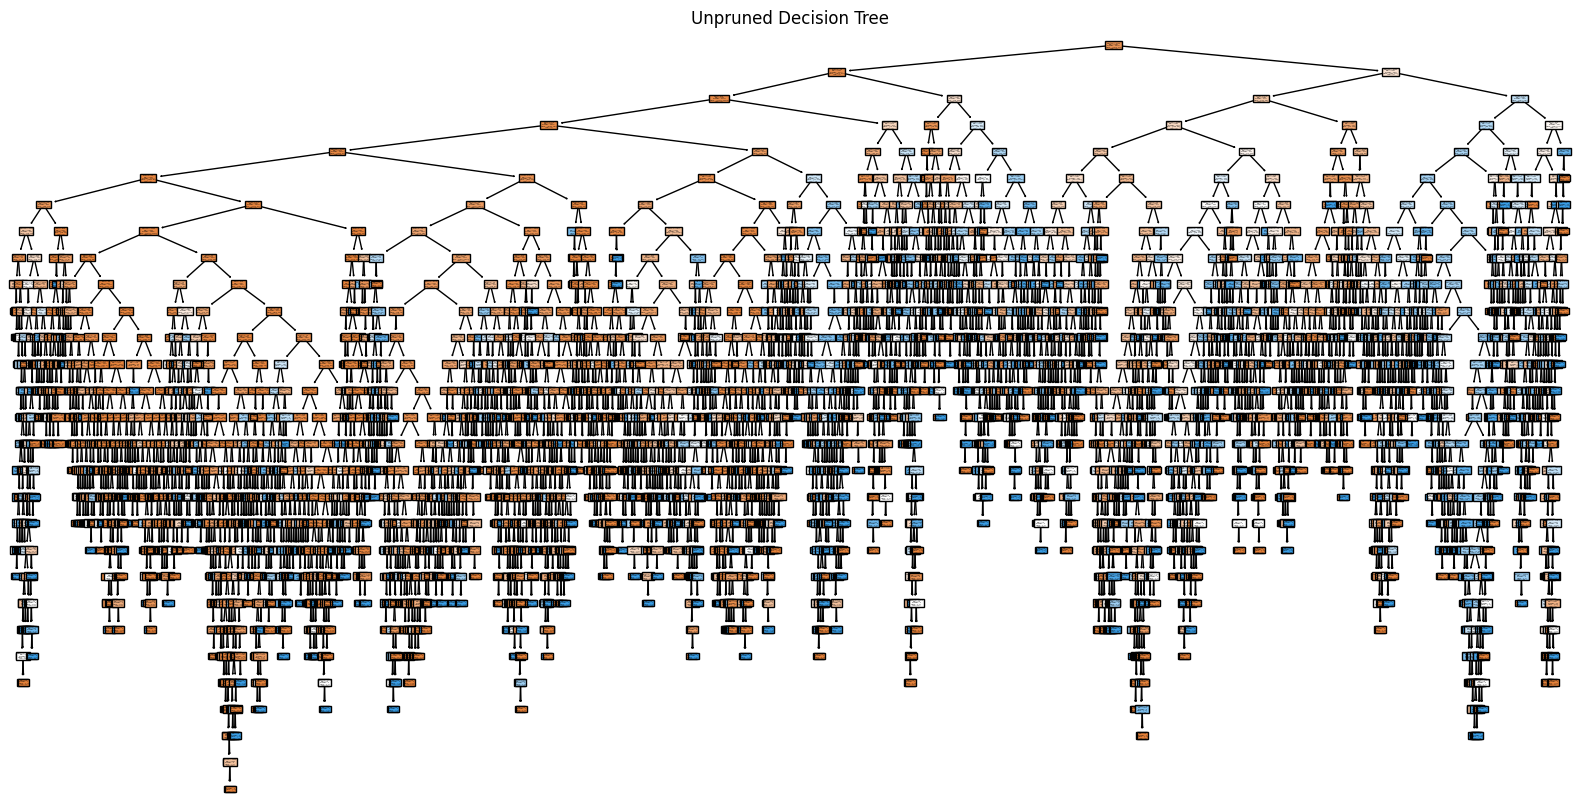

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Unpruned Decision Tree")
plt.show()

In [16]:
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)

In [17]:
print("\nAccuracy (Pruned):", accuracy_score(y_test, y_pred_pruned))
print("\nConfusion Matrix (Pruned):\n", confusion_matrix(y_test, y_pred_pruned))
print("\nClassification Report (Pruned):\n", classification_report(y_test, y_pred_pruned))


Accuracy (Pruned): 0.8858785801172178

Confusion Matrix (Pruned):
 [[7773  179]
 [ 853  238]]

Classification Report (Pruned):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



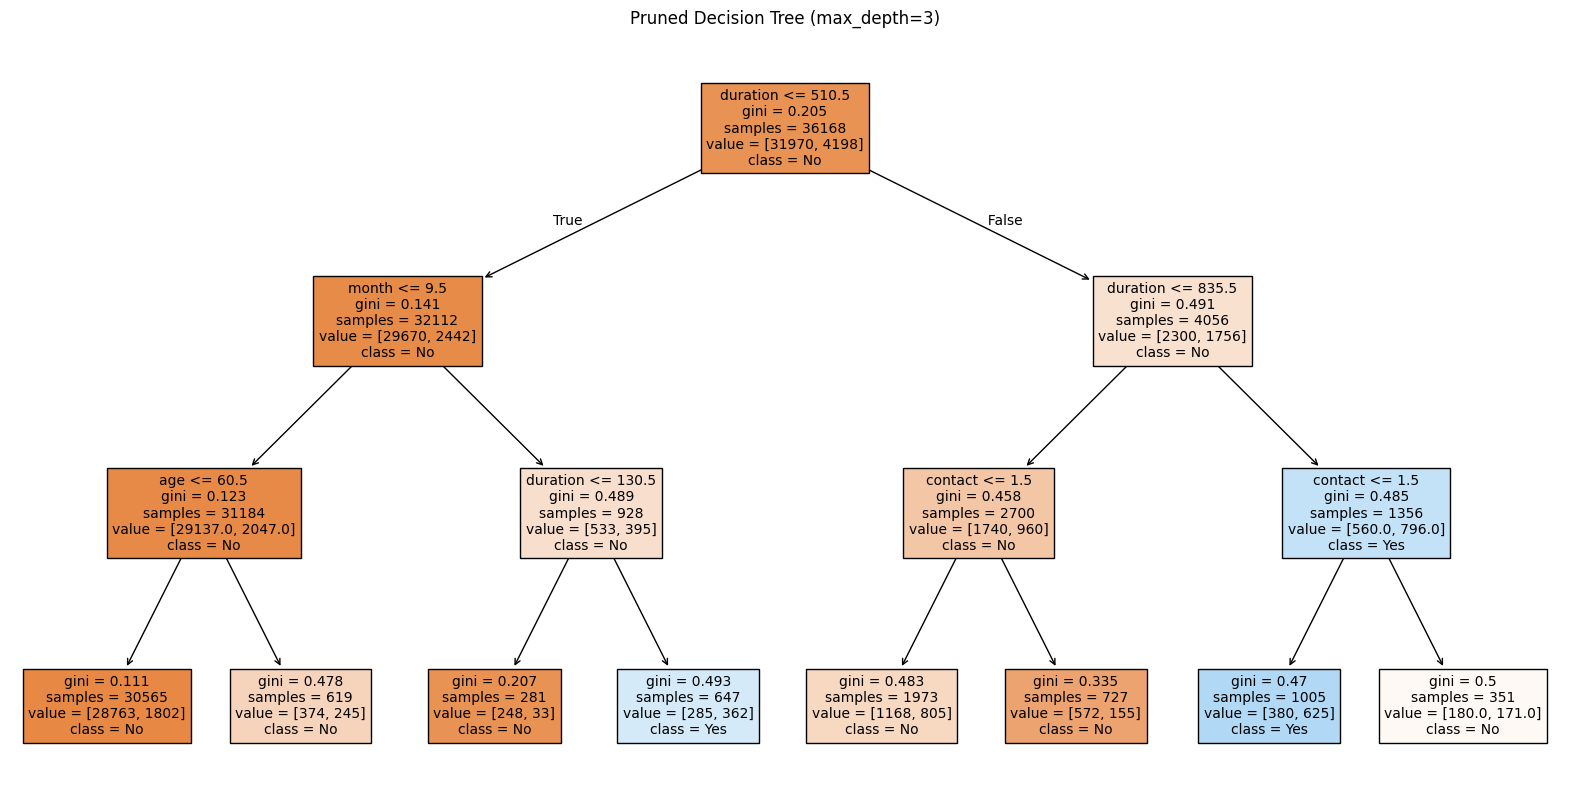

In [18]:
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()